In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("niharikaamritkar/industrial-tools-classification")

print("Path to dataset files:", path)

100%|██████████| 112M/112M [00:01<00:00, 76.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/niharikaamritkar/industrial-tools-classification/versions/1


In [2]:
import shutil

# Define source and destination paths
source_path = '/root/.cache/kagglehub/datasets/niharikaamritkar/industrial-tools-classification/versions/1'
destination_path = '/content/industrial-tools-classification'

# Move the directory
shutil.move(source_path, destination_path)

# Verify the move
import os
print(os.listdir('/content'))


['.config', 'industrial-tools-classification', 'sample_data']


In [9]:
import os
from PIL import Image
from torchvision import transforms

# Base directory path for train images
base_dir = "/content/industrial-tools-classification/train-20240626T051434Z-001/train"
augmented2_dir = "/content/industrial-tools-classification/augmented2_train"

# Augmentation transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=20, scale=(0.8, 1.2)),
])

# Function to augment images
def augment_images_in_directory(input_dir, output_dir, num_augmented_copies=5):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through all subdirectories and files
    for root, dirs, files in os.walk(input_dir):
        # Recreate the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_dir)
        target_dir = os.path.join(output_dir, relative_path)
        os.makedirs(target_dir, exist_ok=True)

        # Process each image file in the current directory
        for file_name in files:
            if file_name.lower().endswith(('png', 'jpg', 'jpeg')):  # Check for valid image formats
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path).convert('RGB')

                # Save the original image to the augmented directory
                img.save(os.path.join(target_dir, file_name))

                # Generate augmented copies
                for i in range(num_augmented_copies):
                    augmented_image = augmentation_transforms(img)
                    augmented_image.save(os.path.join(target_dir, f"{os.path.splitext(file_name)[0]}_aug_{i}.jpg"))

# Run the augmentation process
augment_images_in_directory(base_dir, augmented2_dir, num_augmented_copies=5)


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravirajsinh45/real-life-industrial-dataset-of-casting-product")

print("Path to dataset files:", path)

100%|██████████| 100M/100M [00:01<00:00, 94.2MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2


In [11]:
import shutil

# Define source and destination paths
source_path = '/root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2'
destination_path = '/content/industrial-tools-classification2'

# Move the directory
shutil.move(source_path, destination_path)

# Verify the move
import os
print(os.listdir('/content'))

['.config', 'industrial-tools-classification2', 'industrial-tools-classification', 'sample_data']


In [12]:
import os
import shutil

# Paths for the original datasets
dataset1_dir = "/content/industrial-tools-classification/augmented2_train"
dataset2_def_dir = "/content/industrial-tools-classification2/casting_512x512/casting_512x512/def_front"
dataset2_ok_dir = "/content/industrial-tools-classification2/casting_512x512/casting_512x512/ok_front"

# Path for the combined dataset
combined_dir = "/content/combined_dataset"

# Function to move images to a unified dataset
def move_images_to_combined(input_dir, output_dir, class_label):
    for root, _, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)  # Keep the original directory structure
        target_dir = os.path.join(output_dir, class_label, relative_path)
        os.makedirs(target_dir, exist_ok=True)  # Create the corresponding target directory

        for file_name in files:
            if file_name.lower().endswith(('png', 'jpg', 'jpeg')):
                src_file = os.path.join(root, file_name)
                dst_file = os.path.join(target_dir, file_name)
                shutil.copy(src_file, dst_file)  # Copy the file
                print(f"Copied: {src_file} -> {dst_file}")

# Combine datasets
os.makedirs(combined_dir, exist_ok=True)

# Move the first dataset into the combined dataset
move_images_to_combined(os.path.join(dataset1_dir, "defective"), combined_dir, "defective")
move_images_to_combined(os.path.join(dataset1_dir, "non-defective"), combined_dir, "non-defective")

# Move the second dataset into the combined dataset
move_images_to_combined(dataset2_def_dir, combined_dir, "defective/casting")
move_images_to_combined(dataset2_ok_dir, combined_dir, "non-defective/casting")

print("Datasets successfully combined!")


Streaming output truncated to the last 5000 lines.
Copied: /content/industrial-tools-classification/augmented2_train/non-defective/ball-screw/01_200829075829_397500_315_crop_2_aug_0.jpg -> /content/combined_dataset/non-defective/ball-screw/01_200829075829_397500_315_crop_2_aug_0.jpg
Copied: /content/industrial-tools-classification/augmented2_train/non-defective/ball-screw/01_200828160036_490000_180_crop_2_aug_3.jpg -> /content/combined_dataset/non-defective/ball-screw/01_200828160036_490000_180_crop_2_aug_3.jpg
Copied: /content/industrial-tools-classification/augmented2_train/non-defective/ball-screw/01_200831213230_462500_045_crop_2_aug_3.jpg -> /content/combined_dataset/non-defective/ball-screw/01_200831213230_462500_045_crop_2_aug_3.jpg
Copied: /content/industrial-tools-classification/augmented2_train/non-defective/ball-screw/01_200831133233_477500_315_crop_2_aug_1.jpg -> /content/combined_dataset/non-defective/ball-screw/01_200831133233_477500_315_crop_2_aug_1.jpg
Copied: /content/

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths for the combined dataset and output split directories
combined_dir = "/content/combined_dataset"
output_dir = "/content/split_dataset"

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Function to split and organize dataset
def split_and_organize_dataset(input_dir, output_dir, train_ratio, val_ratio):
    categories = ["defective", "non-defective"]

    for category in categories:
        category_dir = os.path.join(input_dir, category)
        all_images = []
        all_subdirs = []

        # Collect all image paths from subdirectories
        for root, _, files in os.walk(category_dir):
            for file_name in files:
                if file_name.lower().endswith(('png', 'jpg', 'jpeg')):
                    all_images.append(os.path.join(root, file_name))
                    all_subdirs.append(os.path.relpath(root, category_dir))  # Preserve subdir structure

        # Split data into train, val, and test
        train_images, temp_images, train_subdirs, temp_subdirs = train_test_split(
            all_images, all_subdirs, test_size=(1 - train_ratio), stratify=all_subdirs
        )
        val_images, test_images, val_subdirs, test_subdirs = train_test_split(
            temp_images, temp_subdirs, test_size=(test_ratio / (test_ratio + val_ratio)), stratify=temp_subdirs
        )

        # Copy images to respective directories
        def copy_images(images, subdirs, split_name):
            for img_path, subdir in zip(images, subdirs):
                split_dir = os.path.join(output_dir, split_name, category, subdir)
                os.makedirs(split_dir, exist_ok=True)
                shutil.copy(img_path, split_dir)

        copy_images(train_images, train_subdirs, "train")
        copy_images(val_images, val_subdirs, "val")
        copy_images(test_images, test_subdirs, "test")
        print(f"Split completed for {category}")

# Perform the split
os.makedirs(output_dir, exist_ok=True)
split_and_organize_dataset(combined_dir, output_dir, train_ratio, val_ratio)

print("Dataset successfully split into train, val, and test sets!")


Split completed for defective
Split completed for non-defective
Dataset successfully split into train, val, and test sets!


In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim

# Paths to train, val, and test datasets
train_dir = "/content/split_dataset/train"
val_dir = "/content/split_dataset/val"
test_dir = "/content/split_dataset/test"

# Data transformations
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ]),
    "test": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ]),
}

# Create datasets
image_datasets = {
    "train": datasets.ImageFolder(train_dir, transform=data_transforms["train"]),
    "val": datasets.ImageFolder(val_dir, transform=data_transforms["val"]),
    "test": datasets.ImageFolder(test_dir, transform=data_transforms["test"]),
}

# Create dataloaders
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=32, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=32, shuffle=False),
    "test": DataLoader(image_datasets["test"], batch_size=32, shuffle=False),
}

# Define the model (using a pre-trained ResNet here)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(10):  # Train for 10 epochs
    print(f"Epoch {epoch+1}/10")
    for phase in ["train", "val"]:
        if phase == "train":
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == "train"):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                if phase == "train":
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])
        print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

print("Training complete!")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


Epoch 1/10
Train Loss: 0.2666 Acc: 0.8923
Val Loss: 0.1971 Acc: 0.9066
Epoch 2/10
Train Loss: 0.2055 Acc: 0.9167
Val Loss: 0.1898 Acc: 0.9295
Epoch 3/10
Train Loss: 0.1580 Acc: 0.9403
Val Loss: 0.2436 Acc: 0.9145
Epoch 4/10
Train Loss: 0.1366 Acc: 0.9510
Val Loss: 0.1154 Acc: 0.9557
Epoch 5/10
Train Loss: 0.1268 Acc: 0.9520
Val Loss: 0.2676 Acc: 0.8955
Epoch 6/10
Train Loss: 0.1618 Acc: 0.9388
Val Loss: 1.0986 Acc: 0.7561
Epoch 7/10
Train Loss: 0.1130 Acc: 0.9617
Val Loss: 0.1057 Acc: 0.9636
Epoch 8/10
Train Loss: 0.0869 Acc: 0.9701
Val Loss: 0.1247 Acc: 0.9517
Epoch 9/10
Train Loss: 0.0885 Acc: 0.9696
Val Loss: 0.1316 Acc: 0.9588
Epoch 10/10
Train Loss: 0.1106 Acc: 0.9642
Val Loss: 0.2060 Acc: 0.9026
Training complete!


In [15]:
# Saving the model after the last epoch or after achieving the best performance
torch.save(model.state_dict(), 'model_best.pth')  # Save the state_dict to a file


In [16]:
import torch
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
model = models.resnet18(pretrained=False)  # Initialize the same architecture
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Adjust for binary classification
model.load_state_dict(torch.load('model_best.pth'))  # Load saved weights
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate on the test dataset
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get the class predictions
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate evaluation metrics
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=image_datasets["test"].classes))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-16-42885dd689c7>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommen

Classification Report:
               precision    recall  f1-score   support

    defective       0.89      0.96      0.92       629
non-defective       0.96      0.88      0.91       635

     accuracy                           0.92      1264
    macro avg       0.92      0.92      0.92      1264
 weighted avg       0.92      0.92      0.92      1264

Confusion Matrix:
[[603  26]
 [ 78 557]]


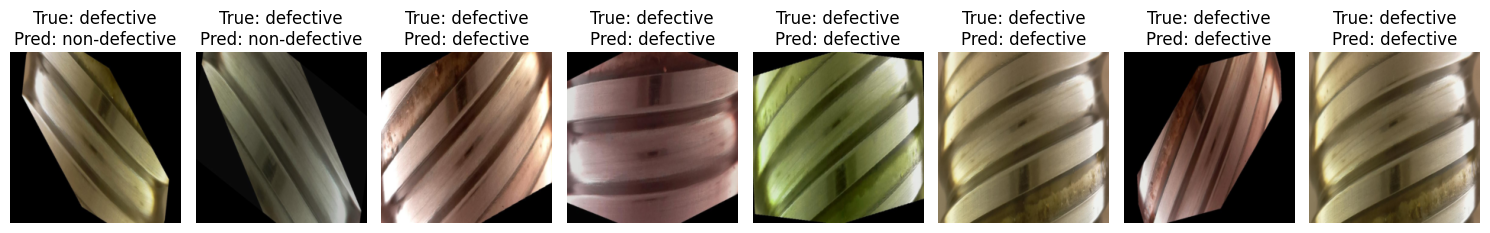

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize some test images along with predictions
def visualize_predictions(inputs, labels, preds, class_names, num_images=8):
    """
    Visualizes a subset of test images with their true and predicted labels.

    Args:
        inputs (torch.Tensor): Batch of input images.
        labels (list): True labels of the images.
        preds (list): Predicted labels of the images.
        class_names (list): List of class names.
        num_images (int): Number of images to display.
    """
    # Limit the number of images to display
    num_images = min(num_images, len(inputs))
    inputs = inputs[:num_images].cpu().permute(0, 2, 3, 1).numpy()  # Convert to numpy format
    inputs = (inputs * 0.5 + 0.5)  # Unnormalize

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]  # Ensure axes is iterable when displaying one image
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(np.clip(inputs[i], 0, 1))  # Clip values to ensure valid display range
        ax.set_title(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Get a batch of test images
inputs, labels = next(iter(dataloaders["test"]))
inputs, labels = inputs.to(device), labels.to(device)

# Run inference to get predictions
with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Visualize the predictions
visualize_predictions(inputs, labels.cpu().numpy(), preds.cpu().numpy(), image_datasets["test"].classes)

